# Задание 4
### В качестве основы для сохранения данных взято задание №3

In [1]:
import pandas as pd
import datetime as dt
import psycopg2
import getpass
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# подключение к БД
usr = 'postgres'
dbs = 'postgres'
host = 'localhost'
port = '5432'
conn = psycopg2.connect(user=usr,
                      database=dbs,
                      host=host,
                      port=port,
                      password=getpass.getpass('Insert password: ')
                    )

Insert password: ········


In [4]:
# возвращает матрицу с кредитным рейтингом
def get_default_matrix(start_date, end_date):
    # SQL запрос
    query="SELECT * FROM ratings_task2 where agency_id = \'EXP\' and date >= \'%s\' and date <= \'%s\'" % (start_date, end_date)
    ratings=pd.read_sql_query(query,conn)
    ratings = ratings[['grade', 'okpo', 'date']]

    # упорядоченный список рейтингов в порядке убывания
    rat_list = ['A++', 'A+', 'A', 'BBB+', 'BBB', 'BBB-', 'BB+', 'BB', 'B++', 'B+', 'B', 'B-','C++', 'C+', 'C', 'D', 'E']
    # названия колонок для таблицы
    col_list = ['non-default', 'default']

    # фильтрация по заданному списку рейтингов
    ratings = ratings[ratings['grade'].isin(rat_list)]

    # шаблон матрицы для расчета кол-ва сех компаний и количества дефолтных из них
    # где названия строк - рейтинг, колонок - кол-во дефолтных и недефолтных компаний
    zer_matrix = np.zeros((len(rat_list), 2), dtype =int)
    def_matrix = pd.DataFrame(zer_matrix, columns = col_list, index=rat_list)

    # группировка по компаниям
    rat_group = ratings.groupby('okpo')

    # итерация по всем оценкам
    for i in range(len(rat_list)):
        # кол-во всех уникальных компаний с данным рейтингом
        comp_num_by_rat = len(ratings[ratings['grade'] == rat_list[i]]['okpo'].unique())
        #def_num = len(rat_group.filter(lambda x: (x['grade'].str.contains(rat_list[i], regex=False).any()) & \
         #                ((x['grade'].str.contains('D', regex=False).any()) | (x['grade'].str.contains('E', regex=False).any())))['okpo'].unique())

        def_num = len(rat_group.filter(lambda x: (x['grade'].isin([rat_list[i]]).any()) & \
                         (x['grade'].isin(['E','D']).any()))['okpo'].unique())

        def_matrix['non-default'][rat_list[i]] = comp_num_by_rat - def_num
        def_matrix['default'][rat_list[i]] = def_num
    
    return def_matrix

In [5]:
# Даты для периода
start_date = "2010-08-04"
end_date = "2016-04-18"
def_matrix = get_default_matrix(start_date, end_date)

### В таблице представлено распределение количества дефолтных и недефолтных компани по рейтингу

In [6]:
def_matrix

,non-default,default
A++,116,1
A+,266,3
A,562,28
BBB+,2,0
BBB,8,0
BBB-,2,0
BB+,1,0
BB,2,0
B++,305,24
B+,110,13


In [12]:
# Задание 1. Пункт a и b
print("Таблица с кредитным рейтингом компаний можно сохранить.")
print("Хотите ли вы сохранить таблицу? Если да, напишите \"да\", иначе любую другую клавишу")
file_name = "Таблица с кредитными рейтингами за период с \'%s\' по \'%s\'" % (start_date, end_date)
path = 'C:\\Users\\User\\Desktop\\'
answer = input()

if answer.lower() == 'да':
    print('\nПо умолчанию файл будет сохранен в папке: %s' % path)
    print('Необходимо ли изменить путь папки? Если да, напишите \"да\", иначе любую другую клавишу')
    answer = input()
    if answer.lower() == 'да':
        print('\nВведите полный путь к папке: ')
        answer = input()
        path = answer
    print('\nПо умолчанию файл будет назван: %s' % file_name)
    print('Необходимо ли изменить название файла? Если да, напишите \"да\", иначе любую другую клавишу')
    answer = input()
    if answer.lower() == 'да':
        print('\nВведите новое название файла:')
        answer = input()
        file_name = answer
        if answer.lower() == 'да':
            file_name = answer
    full_path = path + file_name + ".csv"
    def_matrix.to_csv(full_path, sep=';', encoding='utf-8')
    
    print('\n Файл сохранен в: %s' % full_path)

Таблица с количеством дефолтных и недефолтных компаний можно сохранить.
Хотите ли вы сохранить таблицу? Если да, напишите "да", иначе любую другую клавишу
да

По умолчанию файл будет сохранен в папке: C:\Users\User\Desktop\
Необходимо ли изменить путь папки? Если да, напишите "да", иначе любую другую клавишу
да

Введите полный путь к папке: 
C:\Users\User\Desktop\экспорт\

По умолчанию файл будет назван: Количество дефолтных и недефолтных компаний за период с '2010-08-04' по '2016-04-18'
Необходимо ли изменить название файла? Если да, напишите "да", иначе любую другую клавишу
л

 Файл сохранен в: C:\Users\User\Desktop\экспорт\Количество дефолтных и недефолтных компаний за период с '2010-08-04' по '2016-04-18'.csv


### На графике изображено распредление дефолтных и недефолтных компаний по рейтингам

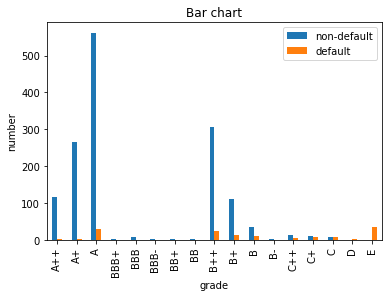

In [37]:
ax = def_matrix.plot(kind='bar', title ="Bar chart", legend=True)
ax.set_xlabel("grade")
ax.set_ylabel("number")
plt.show()

График с кредитными рейтингами компаний можно сохранить.
Хотите ли вы сохранить график? Если да, напишите "да", иначе любую другую клавишу
да

По умолчанию файл будет сохранен в папке: C:\Users\User\Desktop\
Необходимо ли изменить путь папки? Если да, напишите "да", иначе любую другую клавишу
а

По умолчанию файл будет назван: График с кредитными рейтингами компаний за период с '2010-08-04' по '2016-04-18'
Необходимо ли изменить название файла? Если да, напишите "да", иначе любую другую клавишу
а

График сохранен в: C:\Users\User\Desktop\График с кредитными рейтингами компаний за период с '2010-08-04' по '2016-04-18'.png


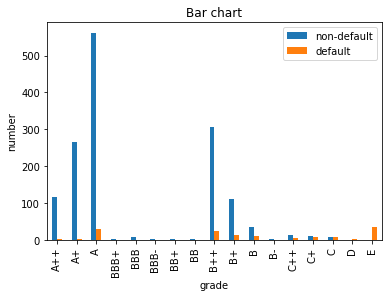

In [38]:
# Задание 1. Пункт a и b
print("График с кредитными рейтингами компаний можно сохранить.")
print("Хотите ли вы сохранить график? Если да, напишите \"да\", иначе любую другую клавишу")
file_name = "График с кредитными рейтингами компаний за период с \'%s\' по \'%s\'" % (start_date, end_date)
path = 'C:\\Users\\User\\Desktop\\'

ax = def_matrix.plot(kind='bar', title ="Bar chart", legend=True)
ax.set_xlabel("grade")
ax.set_ylabel("number")

answer = input()
if answer.lower() == 'да':
    print('\nПо умолчанию файл будет сохранен в папке: %s' % path)
    print('Необходимо ли изменить путь папки? Если да, напишите \"да\", иначе любую другую клавишу')
    answer = input()
    if answer.lower() == 'да':
        print('\nВведите полный путь к папке: ')
        answer = input()
        path = answer
    print('\nПо умолчанию файл будет назван: %s' % file_name)
    print('Необходимо ли изменить название файла? Если да, напишите \"да\", иначе любую другую клавишу')
    answer = input()
    if answer.lower() == 'да':
        print('\nВведите новое название файла:')
        answer = input()
        file_name = answer
        if answer.lower() == 'да':
            file_name = answer
    full_path = path + file_name + ".png"
    plt.savefig(full_path, dpi=100)
    
    print('\nГрафик сохранен в: %s' % full_path)

### На графике изображена ROC-кривая по кредитному рейтингу компаний

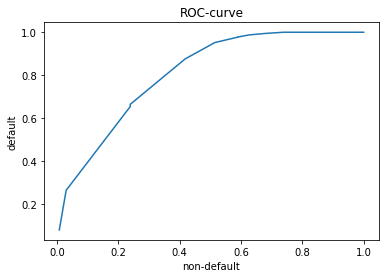

In [41]:
# задание 1. пункт с
print("На графике изображена ROC-кривая по кредитному рейтингу компаний")
roc = pd.DataFrame(index = def_matrix.index)
roc['non-default'] = def_matrix['non-default'].cumsum() / def_matrix['non-default'].sum()
roc['default'] = def_matrix['default'].cumsum() / def_matrix['default'].sum()

plt.plot(roc['default'].values, roc['non-default'].values)
plt.title('ROC-curve')
plt.ylabel('default')
plt.xlabel('non-default')
plt.show()

График с ROC-кривой можно сохранить.
Хотите ли вы сохранить график? Если да, напишите "да", иначе любую другую клавишу
да

По умолчанию файл будет сохранен в папке: C:\Users\User\Desktop\
Необходимо ли изменить путь папки? Если да, напишите "да", иначе любую другую клавишу
а

По умолчанию файл будет назван: График с с ROC-кривой за период с '2010-08-04' по '2016-04-18'
Необходимо ли изменить название файла? Если да, напишите "да", иначе любую другую клавишу
а

График сохранен в: C:\Users\User\Desktop\График с с ROC-кривой за период с '2010-08-04' по '2016-04-18'.png


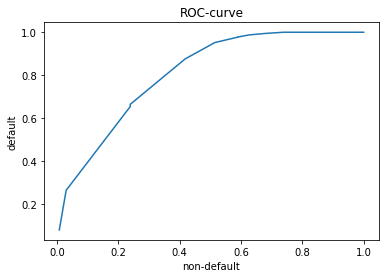

In [40]:
# Задание 1. Пункт a и b
print("График с ROC-кривой можно сохранить.")
print("Хотите ли вы сохранить график? Если да, напишите \"да\", иначе любую другую клавишу")
file_name = "График с с ROC-кривой за период с \'%s\' по \'%s\'" % (start_date, end_date)
path = 'C:\\Users\\User\\Desktop\\'

plt.plot(roc['default'].values, roc['non-default'].values)
plt.title('ROC-curve')
plt.ylabel('default')
plt.xlabel('non-default')

answer = input()
if answer.lower() == 'да':
    print('\nПо умолчанию файл будет сохранен в папке: %s' % path)
    print('Необходимо ли изменить путь папки? Если да, напишите \"да\", иначе любую другую клавишу')
    answer = input()
    if answer.lower() == 'да':
        print('\nВведите полный путь к папке: ')
        answer = input()
        path = answer
    print('\nПо умолчанию файл будет назван: %s' % file_name)
    print('Необходимо ли изменить название файла? Если да, напишите \"да\", иначе любую другую клавишу')
    answer = input()
    if answer.lower() == 'да':
        print('\nВведите новое название файла:')
        answer = input()
        file_name = answer
        if answer.lower() == 'да':
            file_name = answer
    full_path = path + file_name + ".png"
    plt.savefig(full_path, dpi=100)
    
    print('\nГрафик сохранен в: %s' % full_path)
plt.show()

In [ ]:
# Собираем автоматический отчет в виде pdf

from __future__ import print_function
from jinja2 import Environment, FileSystemLoader
from weasyprint import HTML, Document
import os

env = Environment(loader=FileSystemLoader('.'))
template = env.get_template("myreport.html") # Шаблон выложен в папке 111seminar на GitHub, его можно редактировать под себя
template_vars = {"title": "Отчет составил студент Кочеткова Ирина",
                "INTRO": "В документе собраны все данные по заданию кредитного рейтинга", 
                 "TABLE_DESC": "Таблица. Кредитные рейтинги на ", 
                 "TABLE": def_matrix.to_html(), 
                 "IMAGE_DESC": "график с распределение дефотлтных и недефолтных компаний по рейтингам", 
                 "IMAGE": os.path.realpath('C:\\Users\\User\\Desktop\\График с кредитными рейтингами компаний за период с \'%s\' по \'%s\'' % (start_date, end_date)),
                "IMAGE_DESC": "график с ROC-кривой", 
                 "IMAGE": os.path.realpath('C:\\Users\\User\\Desktop\\График с с ROC-кривой за период с \'%s\' по \'%s\'' % (start_date, end_date))
                }
# os.path.realpath - путь к файлу относительно рабочей папки. Код выше подразумевает, что картинка хранится в рабочей папке.
# Собираем и печатаем репорт
html_out = template.render(template_vars, presentational_hints=True)
HTML(string=html_out).write_pdf('my_report.pdf', presentational_hints=True)
# Можно добавлять стилевые настройки, но это уже развлечение of the class.